<a href="https://colab.research.google.com/github/nargis78390-creator/Fake_Review_detection_project/blob/main/MinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

to connect google drive and google colab

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


dataset is loaded from a CSV file

In [11]:
df = pd.read_csv('/content/drive/MyDrive/fake reviews dataset.csv')

In [12]:
length=len(df)
print(length)

40432




```
# This is formatted as code
```

Check the first 100 rows of the dataset

In [13]:
df.head(100)

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
95,Home_and_Kitchen_5,2.0,OR,These are so weak. They barely bring in any air.
96,Home_and_Kitchen_5,5.0,OR,"Great set of glasses! Good quality, comfortab..."
97,Home_and_Kitchen_5,4.0,OR,It feels cool to the touch but is super hard.
98,Home_and_Kitchen_5,5.0,OR,"So cute, made well my grand daughter will love..."


check the last five rows of the dataset

In [14]:
df.tail(20)

,category,rating,label,text_
40412,Clothing_Shoes_and_Jewelry_5,5.0,CG,"OMG, First reason why I chose this style is be..."
40413,Clothing_Shoes_and_Jewelry_5,5.0,OR,The cold damp fog tries to grab at my ankles a...
40414,Clothing_Shoes_and_Jewelry_5,4.0,CG,First off I returned this pair. The quality is...
40415,Clothing_Shoes_and_Jewelry_5,5.0,OR,I'd consider myself an advanced non-profession...
40416,Clothing_Shoes_and_Jewelry_5,3.0,CG,"When I saw this ring, I thought it was very be..."
40417,Clothing_Shoes_and_Jewelry_5,5.0,OR,I cannot thank my boss enough for recommending...
40418,Clothing_Shoes_and_Jewelry_5,2.0,CG,This bag weighs exactly 10pounds (I wear an XL...
40419,Clothing_Shoes_and_Jewelry_5,5.0,OR,Sometimes it is so hard to find a loose comfor...
40420,Clothing_Shoes_and_Jewelry_5,5.0,CG,I just bought these locally and they are the b...
40421,Clothing_Shoes_and_Jewelry_5,2.0,OR,"I'm a 36B, which means that I don't need any h..."


Check for any missing values


In [15]:
df.isnull().sum()

,0
category,0
rating,0
label,0
text_,0


assess the structure and quality of your DataFrame

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


 for a quick statistical summary of numerical data

In [17]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [18]:
df['rating'].value_counts()

,count
rating,
5.0,24559
4.0,7965
3.0,3786
1.0,2155
2.0,1967


removing punctuation and stopwords

In [19]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [20]:
df['text_'][0], clean_text(df['text_'][0])

('Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty',
 'Love Well made sturdy comfortable love itVery pretty')

In [21]:
df['text_'].head().apply(clean_text)

,text_
0,Love Well made sturdy comfortable love itVery ...
1,love great upgrade original Ive mine couple years
2,pillow saved back love look feel pillow
3,Missing information use great product price
4,nice set Good quality set two months


In [22]:
df.shape

(40432, 4)

In [23]:
df['text_'] = df['text_'].astype(str)

In [24]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [25]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [26]:
preprocess(df['text_'][4])

'Very nice set Good quality We set two months'

In [27]:
df['text_'][:10000] = df['text_'][:10000].apply(preprocess)

In [28]:
df['text_'][10001:20000] = df['text_'][10001:20000].apply(preprocess)

In [29]:
df['text_'][20001:30000] = df['text_'][20001:30000].apply(preprocess)

In [30]:
df['text_'][30001:40000] = df['text_'][30001:40000].apply(preprocess)

In [31]:
df['text_'][40001:40432] = df['text_'][40001:40432].apply(preprocess)

In [32]:
df['text_'] = df['text_'].str.lower()

In [33]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['text_'] = df['text_'].apply(lambda x: stem_words(x))

In [34]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["text_"] = df["text_"].apply(lambda text: lemmatize_words(text))


In [35]:
df['text_'].head()


,text_
0,love well made sturdi comfort i love veri pretti
1,love great upgrad origin i 've mine coupl year
2,thi pillow save back i love look feel pillow
3,miss inform use great product price i
4,veri nice set good qualiti we set two month


In [36]:
df.to_csv('Preprocessed Fake Reviews Detection Dataset.csv')



In [37]:
df.columns = df.columns.str.strip()


In [38]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year
2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month


Apply cleaning function to your text column

In [39]:
import re
import string

# Define the clean_text function to process the text
def clean_text(text):
    # Remove punctuation
    text = re.sub(f"[{string.punctuation}]", "", text)
    # Convert text to lowercase
    text = text.lower()
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = text.strip()
    return text


In [40]:
df['cleaned_reviews'] = df['text_'].apply(clean_text)


In [41]:
df.drop(columns=['category','rating','text_'],inplace=True,errors='ignore')


In [42]:
df

,label,cleaned_reviews
0,CG,love well made sturdi comfort i love veri pretti
1,CG,love great upgrad origin i ve mine coupl year
2,CG,thi pillow save back i love look feel pillow
3,CG,miss inform use great product price i
4,CG,veri nice set good qualiti we set two month
...,...,...
40427,OR,i read review say bra ran small i order two ba...
40428,CG,i nt sure exactli would it littl larg small si...
40429,OR,you wear hood wear hood wear jacket without ho...
40430,CG,i like noth dress the reason i gave star i ord...


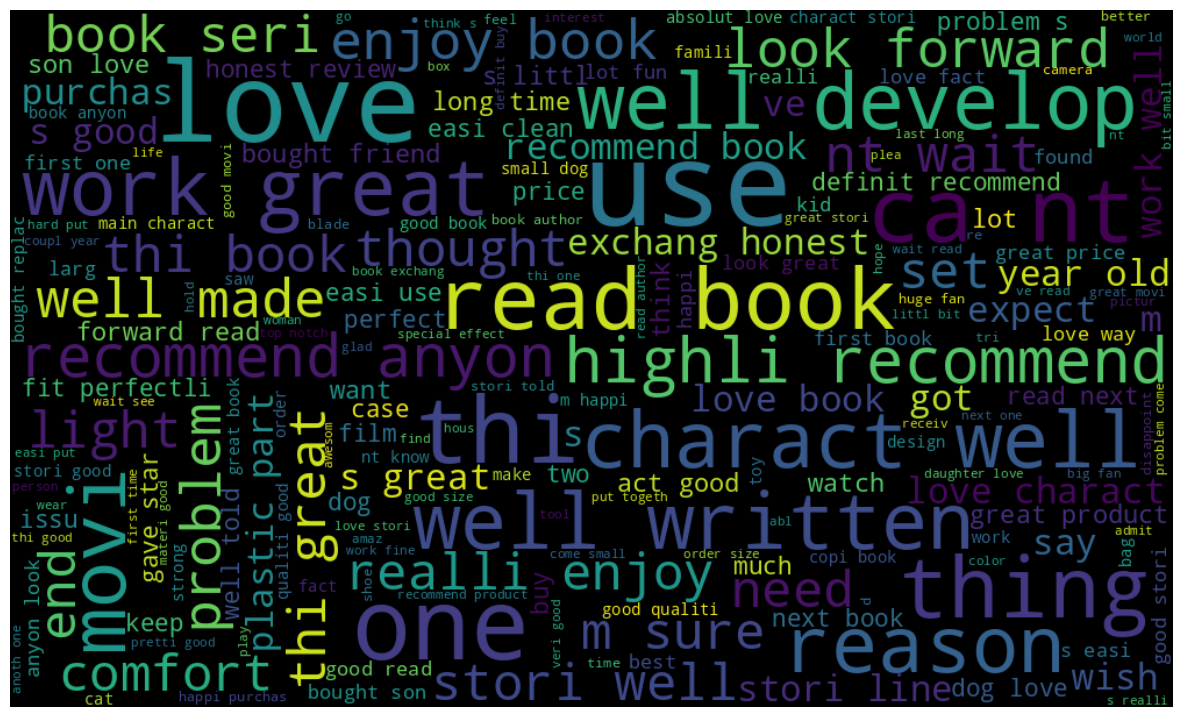

In [43]:
# draw wordcloud (for fake review)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(word for word in df['cleaned_reviews'][df['label'] == 'CG'].astype(str))
wordcloud = WordCloud(width=1000, height=600,max_font_size = 100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(text), interpolation='bilinear')
plt.axis('off')
plt.show()

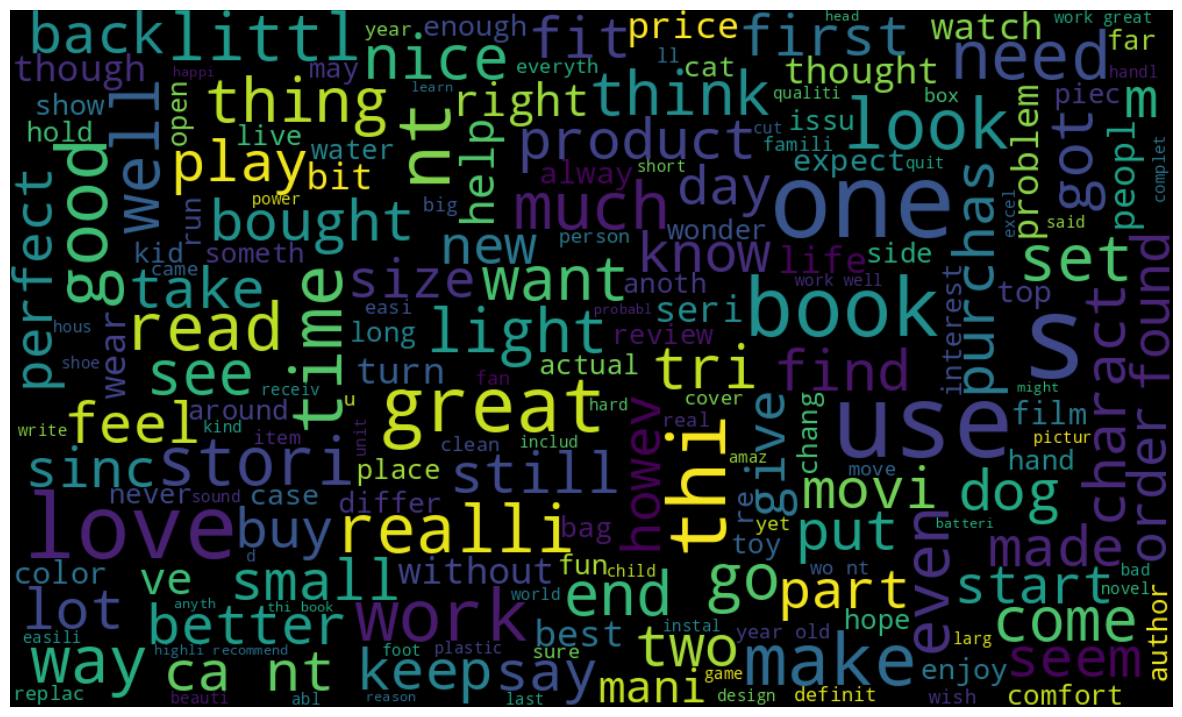

In [44]:
# draw wordcloud (for original or real review)

text = ' '.join(word for word in df['cleaned_reviews'][df['label'] == 'OR'].astype(str))
wordcloud = WordCloud(width=1000, height=600,max_font_size = 100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(text), interpolation='bilinear')
plt.axis('off')
plt.show()

In [45]:
#input
x= df['cleaned_reviews']
#output
y = df['label']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [47]:
#TfidVectorizer --> TF(Term Freq) * IDF (Inverse Doc Freq)

In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32345,)
(8087,)
(32345,)
(8087,)


In [49]:
x_train

,cleaned_reviews
33802,good qualiti great color veri plea puzzl it ri...
6320,nice lowcost altern wo nt stand much abus surp...
21127,it s april cat stay hous seem work nt flea sti...
39676,honestli probabl one favorit jean reason i cho...
3005,i got littl excit use product orchard pick app...
...,...
10410,it s use i write review i first time builder o...
8453,quit work had profession instal nov quit work...
39227,i look high low purpl soft kitti tshirt thank ...
19288,wierd nt know long i thought would small easi ...


In [50]:
y_train

,label
33802,OR
6320,OR
21127,OR
39676,CG
3005,OR
...,...
10410,OR
8453,OR
39227,OR
19288,CG


Embedding with Sentence Transformers

In [51]:
# Install sentence-transformers library
!pip install -q sentence-transformers

# Import model
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load pre_trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Make sure all reviews are string type
df['cleaned_reviews'] = df['cleaned_reviews'].astype(str)

# Convert text to dense embeddings
embeddings = model.encode(df['cleaned_reviews'].tolist(), show_progress_bar=True)

#label encoding (Prepare target)
label_map = {'CG': 0, 'OR': 1}
df['label'] = df['label'].map(label_map)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(embeddings, df['label'], test_size=0.2, random_state=42)

# Train Logistic Regression  model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Evaluate model performance
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['CG', 'OR']))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.3 MB/s eta 0:00:00


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1264 [00:00<?, ?it/s]

              precision    recall  f1-score   support

          CG       0.77      0.79      0.78      4016
          OR       0.79      0.76      0.77      4071

    accuracy                           0.78      8087
   macro avg       0.78      0.78      0.78      8087
weighted avg       0.78      0.78      0.78      8087



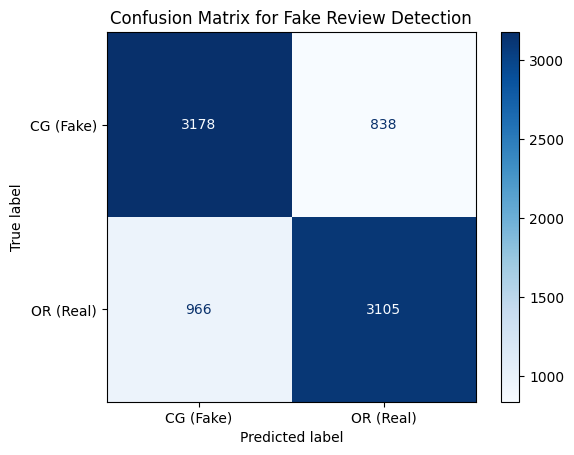

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['CG (Fake)', 'OR (Real)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Fake Review Detection")
plt.show()


In [53]:
plt.savefig("confusion_matrix.png", dpi=300)


<Figure size 640x480 with 0 Axes>

In [54]:
from google.colab import files
files.download("confusion_matrix.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

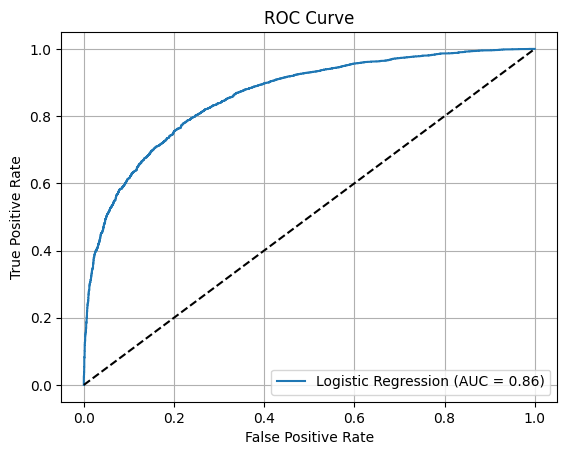

In [55]:
# Plot ROC curve after confusion matrix

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get scores (not hard predictions) for ROC
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal for baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.savefig("roc_curve.png", dpi=300)
plt.show()


In [56]:
plt.savefig("roc_curve.png", dpi=300)


<Figure size 640x480 with 0 Axes>

In [57]:
from google.colab import files
files.download("roc_curve.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

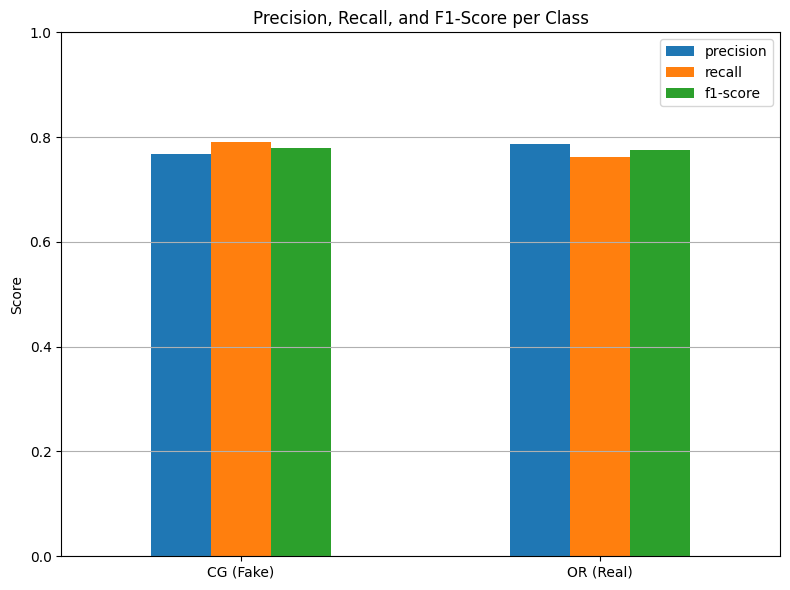

In [58]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Get classification report as a dictionary
report = classification_report(y_test, y_pred, target_names=['CG (Fake)', 'OR (Real)'], output_dict=True)

# Convert to DataFrame for plotting
df_report = pd.DataFrame(report).transpose()

# Only keep classes, not 'accuracy', 'macro avg', etc.
df_report = df_report.iloc[:2][['precision', 'recall', 'f1-score']]

# Plot
df_report.plot(kind='bar', figsize=(8, 6))
plt.title('Precision, Recall, and F1-Score per Class')
plt.ylabel('Score')
plt.ylim(0, 1.0)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("f1_scores_barplot.png", dpi=300)
plt.show()


In [59]:
from google.colab import files
files.download("f1_scores_barplot.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
#install a python library for creating simple web apps
!pip install -q --upgrade gradio

#import gradio for building interface
import gradio as gr

#define function
def review_checker(Review):
    emb = model.encode([Review])# Convert input review to sentence embedding
    pred = clf.predict(emb)[0]  # Predict label using trained model
    return "Fake" if pred == 1 else "Real" # return output

gr.Interface(fn=review_checker, inputs="textbox", outputs="label", title="Fake Review Detector").launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://91b88ceb4733a60013.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [61]:
!pip install nbstripout
!nbstripout MinorProject.ipynb


Could not strip 'MinorProject.ipynb': file not found
